In [133]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
def randIntv(low, high, num):
    '''
    Compute `num` random integers between `high` (excl.) and `low`
    '''
    rnds = []
    while(len(rnds) < num):
        t = np.random.randint(low, high)
        while(t in rnds):
            t = np.random.randint(low, high)
        rnds.append(t)
    return rnds

In [135]:
def polyLag(x, xk,yk):
    '''
    Compute polynomial interpolation using Lagrange-polynomialsen 
    '''
    sum = 0
    n = len(xk)
    for i in range(n):
        lag = 1;
        ls = [x for x in range(n) if x != i]
        for j in ls:
            lag *= (x-xk[j])/(xk[i]-xk[j])
            
        sum += yk[i] * lag
            
    return sum

In [136]:
def polyNeville(x, xk, yk, r=None, ks=None):
    '''
    Recursively compute polynomial interpolation through (xk,yk) by Neville-Algorithm

    Parameters:
    x = x-Value to calculate Interpolation for
    xk = numpy-array of x-Values to interpolate through
    yk = numpy-array of y-Values to interpolate through
    '''
    n = len(xk)

    # hack to make avoid giving r and ks as arguments to the function 
    if(r == None and ks == None):
        r = n
        ks=[x for x in range(n)]
    
    if(len(xk) != len(yk)):
        print("horst!")
        exit(666)

    if(r == 1):
        r = n
        return yk[ks[0]]
        
    else:
        return ((x - xk[ ks[0] ]) * polyNeville(x, xk, yk, r-1, ks=ks[1:]) -
                (x - xk[ ks[-1] ]) * polyNeville(x, xk, yk, r-1, ks=ks[-2::-1])) \
                / (xk[ ks[-1] ] - xk[ ks[0]] )

In [137]:
xk = np.array(randIntv(0,10,10))
yk = np.array(randIntv(0,10,10))

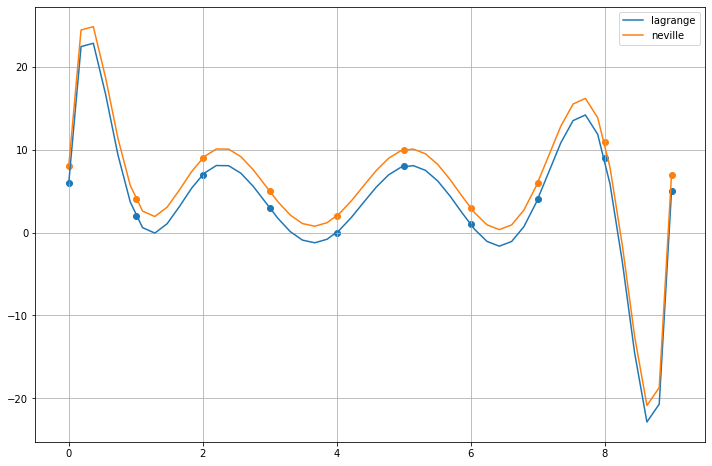

In [138]:
x = np.linspace(xk.min(), xk.max(), 50)

plt.figure(facecolor=[1,1,1,1], figsize=(12,8))

plt.scatter(xk, yk)
plt.plot(x, polyLag(x, xk, yk), label="lagrange")
plt.scatter(xk, yk+2)
plt.plot(x, polyNeville(x, xk, yk+2), label="neville")

plt.legend()
plt.grid()
plt.show() 